In [204]:
# 1. Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [205]:
# Import dataset
df_train = pd.read_csv("../1_input/training.csv")
df_test = pd.read_csv("../1_input/test.csv")
submission_df = pd.read_csv("../1_input/example_entry.csv")

pd.set_option('display.max_columns',None)

In [206]:
df_train.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [207]:
df_test.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [208]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

0    64007
1     8976
Name: IsBadBuy, dtype: int64


<Axes: >

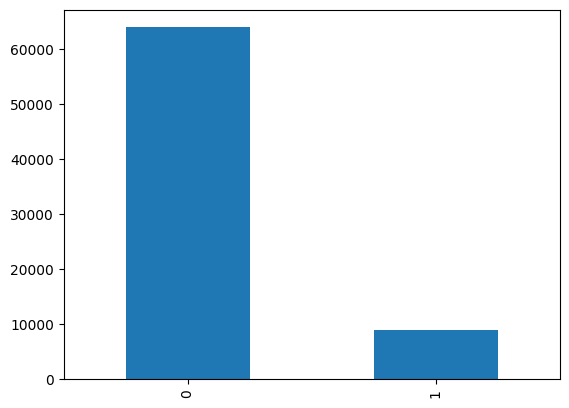

In [209]:
print(df_train.IsBadBuy.value_counts())
df_train.IsBadBuy.value_counts().plot.bar()

- the target variable is highly unbalanced. 

In [210]:
numerical_features = df_train.drop(['IsBadBuy','RefId'], axis=1).select_dtypes(include='number').columns.tolist()
categorical_features = df_train.drop(['IsBadBuy','RefId'], axis=1).select_dtypes(exclude='number').columns.tolist()

# Handling missing values

## Numerical Feautres

In [211]:
# check for missing values
pd.DataFrame(df_train[numerical_features].isna().sum()/df_train.shape[0])

# no siginficant missing values - can be replaced by mean values

,0
VehYear,0.000000
VehicleAge,0.000000
WheelTypeID,0.043421
VehOdo,0.000000
MMRAcquisitionAuctionAveragePrice,0.000247
MMRAcquisitionAuctionCleanPrice,0.000247
MMRAcquisitionRetailAveragePrice,0.000247
MMRAcquisitonRetailCleanPrice,0.000247
MMRCurrentAuctionAveragePrice,0.004316
MMRCurrentAuctionCleanPrice,0.004316


In [212]:
# all na values filled with mean
df_train[numerical_features] = df_train[numerical_features].fillna(df_train[numerical_features].mean())
df_test[numerical_features] = df_test[numerical_features].fillna(df_test[numerical_features].mean())

## Categorical features

In [213]:
# checking missing values for categorical features
pd.DataFrame(df_train[categorical_features].isna().sum()/df_train.shape[0])

# significant missing values for "PRIMEUNIT","AUCGUART" with over 95% missing values  - can be dropped

,0
PurchDate,0.000000
Auction,0.000000
Make,0.000000
Model,0.000000
Trim,0.032336
SubModel,0.000110
Color,0.000110
Transmission,0.000123
WheelType,0.043490
Nationality,0.000069


In [214]:
# dropping columns 
df_train.drop(["PRIMEUNIT","AUCGUART"], axis=1, inplace=True)
df_test.drop(["PRIMEUNIT","AUCGUART"], axis=1, inplace=True)

In [215]:
# updating cateforical_features
categorical_features = [x for x in categorical_features if x not in ["PRIMEUNIT","AUCGUART"]]

In [216]:
# fill mode/most frequest observation for missing vlaue

for col in categorical_features:
    mod=df_train[col].mode()[0]
    df_train[col].fillna(mod, inplace=True)
    
    mod=df_test[col].mode()[0]
    df_test[col].fillna(mod, inplace=True)


In [217]:
pd.DataFrame(df_train[categorical_features].isna().sum()/df_train.shape[0])

# no missing value now. 

,0
PurchDate,0.0
Auction,0.0
Make,0.0
Model,0.0
Trim,0.0
SubModel,0.0
Color,0.0
Transmission,0.0
WheelType,0.0
Nationality,0.0


# Features with low variance

In [218]:
# Numerical features

pd.DataFrame(round(df_train[numerical_features].var(),0))

# clear that "VehYear", "VehicleAge", "WheelTypeID","IsOnlineSale" has significantly low variance. hence, dropping these columns. 

df_train.drop(["VehYear", "VehicleAge", "WheelTypeID","IsOnlineSale"], axis=1, inplace=True)
df_test.drop(["VehYear", "VehicleAge", "WheelTypeID","IsOnlineSale"], axis=1, inplace=True)

# updating numarical_features list of col
numerical_features = [x for x in numerical_features if x not in ["VehYear", "VehicleAge", "WheelTypeID", "IsOnlineSale"]]

In [219]:
# categorical features

for col in categorical_features:
    uniq_observation = df_train[col].nunique()          # find the unique observation for each column
    if uniq_observation < 10:                       # if less than 10 level
        print(f"Unique observations in {col}:", uniq_observation)
        observation_count = df_train[col].value_counts(normalize=True)   # value count observation at each level
        #print(observation_count)
        print()

        # Check if any value's observation count is less than 0.02
        infrequent_values = observation_count[observation_count < 0.02].index.tolist()   # if observatin at each level is below 2%,
        
        if len(infrequent_values) > 0:
            print(infrequent_values)
            # Find the most frequent value in the column
            most_frequent_value = observation_count.idxmax()

            # Replace infrequent values with the most frequent value
            df_train[col] = df_train[col].apply(lambda x: most_frequent_value if x in infrequent_values else x)     # replacing level with less than 2% observation with mode.

Unique observations in Auction: 3

Unique observations in Transmission: 3

['Manual']
Unique observations in WheelType: 3

['Special']
Unique observations in Nationality: 4

['OTHER']
Unique observations in TopThreeAmericanName: 4



# Scalling numerical features

In [220]:
num_scaler = StandardScaler()

num_scaler.fit(df_train[numerical_features])

df_train[numerical_features] = num_scaler.transform(df_train[numerical_features])
df_test[numerical_features] = num_scaler.transform(df_test[numerical_features])

# Ordinal encoding for categorical features

In [221]:
encoder= OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

encoder.fit(df_train[categorical_features])

df_train[categorical_features] = encoder.transform(df_train[categorical_features])
df_test[categorical_features] = encoder.transform(df_test[categorical_features])

# Train test split

In [222]:
df_train.head()

,RefId,IsBadBuy,PurchDate,Auction,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,WarrantyCost
0,1,0,164.0,0.0,17.0,586.0,132.0,221.0,12.0,0.0,0.0,1.203528,1.0,5.0,3.0,0.823055,0.901998,0.994642,1.107440,0.542923,0.433259,0.914809,0.685304,-0.170036,-0.933946,5.0,0.208767,-0.273162
1,2,0,164.0,0.0,5.0,0.0,93.0,765.0,14.0,0.0,0.0,1.515419,0.0,4.0,0.0,0.294552,0.370798,0.760476,0.803779,0.544981,0.683219,0.842501,0.800954,-0.260831,-0.933946,5.0,0.491599,-0.373355
2,3,0,164.0,0.0,5.0,883.0,98.0,292.0,7.0,0.0,1.0,0.158244,0.0,5.0,0.0,-1.188992,-0.960141,-0.492426,-0.411753,-0.863248,-0.684101,-0.528444,-0.436982,-0.260831,-0.933946,5.0,-1.035693,0.187727
3,4,0,164.0,0.0,5.0,662.0,98.0,152.0,13.0,0.0,0.0,-0.403531,0.0,0.0,0.0,-1.720745,-1.726083,-1.216472,-1.229099,-1.765157,-1.770122,-1.426951,-1.400930,-0.260831,-0.933946,5.0,-1.488224,-1.079718
4,5,0,164.0,0.0,6.0,368.0,126.0,52.0,13.0,1.0,1.0,-0.146308,0.0,0.0,1.0,-0.900164,-0.852138,-0.245268,-0.337906,-1.187623,-1.121717,-0.660415,-0.676455,-0.260831,-0.933946,5.0,-1.544791,-0.428461


In [223]:
y=df_train['IsBadBuy']
x=df_train.drop(['IsBadBuy','RefId'], axis=1)
x_test=df_test.drop('RefId', axis=1)

In [224]:
# train validation split
x_train, x_val, y_train, y_val  = train_test_split(x,y,train_size=0.8, random_state=20)

# Building Model

In [225]:
model = RandomForestClassifier(n_estimators=100, random_state=20)
#model=LogisticRegression(max_iter=5000)
#model = DecisionTreeClassifier(criterion='gini')
#model = KNeighborsClassifier(n_neighbors=3)
#model = SVC() # - worst

model.fit(x_train, y_train)

RandomForestClassifier(random_state=20)

In [226]:
y_pred = model.predict(x_train)

print("Accuracy score for Training set:", accuracy_score(y_train, y_pred))

print("\nClassification report for Training set: \n", classification_report(y_train, y_pred))

Accuracy score for Training set: 0.9999828726064468

Classification report for Training set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     51152
           1       1.00      1.00      1.00      7234

    accuracy                           1.00     58386
   macro avg       1.00      1.00      1.00     58386
weighted avg       1.00      1.00      1.00     58386



In [227]:
y_pred = model.predict(x_val)

print("Accuracy score for Validation set:", accuracy_score(y_val, y_pred))

print("\nClassification report for Validation set: \n", classification_report(y_val, y_pred))

Accuracy score for Validation set: 0.8820305542234705

Classification report for Validation set: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     12855
           1       0.67      0.02      0.04      1742

    accuracy                           0.88     14597
   macro avg       0.77      0.51      0.49     14597
weighted avg       0.86      0.88      0.83     14597



In [228]:
submission_df['RefId'] = df_test['RefId']

y_pred = model.predict(x_test)
submission_df['IsBadBuy'] = y_pred

In [229]:
submission_df['IsBadBuy'].value_counts()

0    48565
1      142
Name: IsBadBuy, dtype: int64